In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
## mean_list will be always the same
mean_list = np.array([(0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)])

## for all sigma values 
sigma_list = np.square(np.array([1/8,1/4,1/2,np.sqrt(2)/2]))

In [3]:
def sample_df():
   
    v = np.random.rand(10,4)
    v[:,3] = np.random.randint(0,2,size=10)
    df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
   
    
    return df

In [4]:
def plot_3D(X,y):

    # Visualizing 3-D numeric data with Scatter Plots
    # length, breadth and depth
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = X[:,0]
    ys = X[:,1]
    zs = X[:,2]
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, c= y ,edgecolors='w')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    
    plt.show()

In [5]:
def create_dataset(point_list, sigma,size,labels = False):
    
    diagonal = np.array([[1,0,0],[0,1,0],[0,0,1]])
    cov = diagonal*sigma
    
    dataset = []
    
    for point in point_list:
        
        data = np.random.multivariate_normal(point,cov,size=size)
        
        dataset.append(data)
        
    if labels:
        dataset_labeled = []
        for i,d in enumerate(dataset):
            dataset_labeled.append([i,d]) 
        
        dataset = dataset_labeled
        
    return dataset

def create_dataframe(dataset):

    all_data = []

    for d in dataset:

        label = d[0]
        data = d[1]

        for e in data:

            f = list(e)
            f.append(label)

            all_data.append(f)
            
    df = pd.DataFrame(all_data, columns=['x1','x2','x3','y'])
    
    return df

In [26]:
size = 1000

dataset1 = create_dataset(mean_list, sigma_list[0],size,labels=True)
dataset2 = create_dataset(mean_list, sigma_list[1],size,labels=True)
dataset3 = create_dataset(mean_list, sigma_list[2],size,labels=True)
dataset4 = create_dataset(mean_list, sigma_list[3],size, labels = True)

In [27]:
df = create_dataframe(dataset1)

In [28]:
X,y = df[['x1','x2','x3']].values, df['y'].values

In [29]:
X,y

(array([[ 0.22461669,  0.09949821,  0.11840808],
        [ 0.07965948,  0.10459377, -0.10949576],
        [-0.12462812,  0.17790412, -0.1041081 ],
        ...,
        [ 1.10126889,  1.10538151,  1.00036279],
        [ 1.00986804,  0.76383575,  0.89260086],
        [ 0.81374454,  0.88979599,  1.12817399]]),
 array([0, 0, 0, ..., 7, 7, 7]))

In [30]:
def clustering(X):
    
    k_means = KMeans(n_clusters=8)
    
    db_scan = DBSCAN() 
    
    
    
    
    k_means.fit(X)
    
    db_scan.fit(X)
    
    em.fit(X)
    
    return k_means, db_scan, em

In [61]:
def k_means(X, cluster_num):
    
    k_means = KMeans(cluster_num) ## initialize Kmeans clustering 
     
    k_means.fit(X)  ## cluster
    
    y = k_means.predict(X) ## predict cluster id for each data point
    
    return y 

def expectation_maximization(X, cluster_num=8):
    
    em = GaussianMixture(n_components=cluster_num,init_params='random')
    
    em.fit(X)
    
    y = em.predict(X)
    
    return y

def dbscan(X):
    
    

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dbscanner = DBSCAN()
    
    y = dbscanner.fit_predict(X_scaled)
    
    return y

In [62]:
y_kmeans = k_means_clustering(X,8)
y_em = expectation_maximization(X,8)
y_dbscan = dbscan(X)

In [63]:
print(y_dbscan)

[0 0 0 ... 2 2 2]


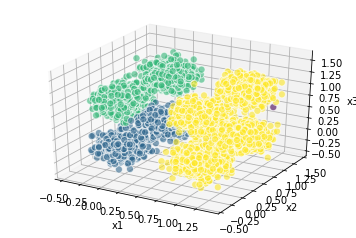

In [64]:
plot_3D(X,y_dbscan)